In [34]:
#Import Required Modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt

In [20]:
#Load Pre-Processed Train / Test Data

train_df = pd.read_csv('Train-Data.csv')
test_df = pd.read_csv('Test-Data.csv')

print(f'Train Length: {len(train_df)}, Test Length: {len(test_df)}')

Train Length: 1760, Test Length: 440


In [21]:
#Prepare Data For ML input
trainx = train_df.iloc[:,:-1].values.tolist()
trainy = train_df['label'].tolist()

testx = test_df.iloc[:,:-1].values.tolist()
testy = test_df['label'].tolist()

In [22]:
#Validate Correct Input Shapes
print(f'Trainx: {len(trainx)}, Trainy: {len(trainy)}')
print(f'Testx: {len(testx)}, Testy: {len(testy)}')

Trainx: 1760, Trainy: 1760
Testx: 440, Testy: 440


In [23]:
#Encode Classification Labels
le = LabelEncoder()

le.fit(trainy)

trainy = le.transform(trainy)
testy = le.transform(testy)

In [24]:
#Support Vector Machine
SVM_Params_Grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

SVM = SVC()
SVM_grid_search = GridSearchCV(SVM, SVM_Params_Grid, cv=3)
SVM_grid_search.fit(trainx, trainy)
SVM_preds = SVM_grid_search.predict(testx)

In [25]:
#Knn Classifier
Knn_Params_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

Knn = KNeighborsClassifier()
Knn_grid_search = GridSearchCV(Knn, Knn_Params_grid, cv=3)
Knn_grid_search.fit(trainx, trainy)
Knn_preds = Knn_grid_search.predict(testx)

In [26]:
#Random Forest Classifier
rnd_forest_Params_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 4]
}

rnd_forest = RandomForestClassifier()
rnd_forest_grid_search = GridSearchCV(rnd_forest, rnd_forest_Params_grid, cv=3)
rnd_forest_grid_search.fit(trainx, trainy)
rnd_forest_preds = rnd_forest_grid_search.predict(testx)

In [27]:
def get_performance_metrics(preds):
    metrics = {}
    metrics['acc'] = accuracy_score(testy, preds)
    metrics['prec'] = precision_score(testy, preds, average='macro')
    metrics['rec'] = recall_score(testy, preds, average='macro')
    metrics['f1'] = f1_score(testy, preds, average='macro')
    metrics['cm'] = confusion_matrix(testy, preds)
    return metrics

In [28]:
SVM_Metrics = get_performance_metrics(SVM_preds)
Knn_Metrics = get_performance_metrics(Knn_preds)
rnd_forest_Metrics = get_performance_metrics(rnd_forest_preds)

In [32]:
print("SVM Metrics:", {k:round(v, 3) for k,v in SVM_Metrics.items() if k != 'cm'})
print("Knn Metrics:", {k:round(v, 3) for k,v in Knn_Metrics.items() if k != 'cm'})
print("random Forest Metrics:", {k:round(v, 3) for k,v in rnd_forest_Metrics.items() if k != 'cm'})

SVM Metrics: {'acc': 0.961, 'prec': 0.963, 'rec': 0.963, 'f1': 0.96}
Knn Metrics: {'acc': 0.97, 'prec': 0.972, 'rec': 0.971, 'f1': 0.97}
random Forest Metrics: {'acc': 0.993, 'prec': 0.993, 'rec': 0.993, 'f1': 0.993}


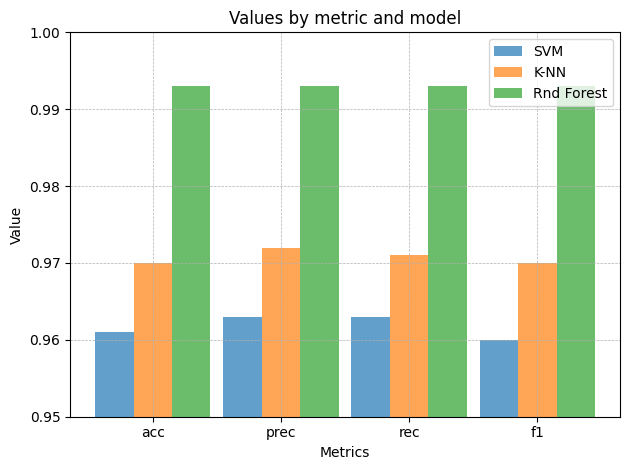

In [41]:
#Visualise Metrics
SVM_Dict = {k:round(v, 3) for k,v in SVM_Metrics.items() if k != 'cm'}
Knn_Dict = {k:round(v, 3) for k,v in Knn_Metrics.items() if k != 'cm'}
Rnd_Forest_Dict = {k:round(v, 3) for k,v in rnd_forest_Metrics.items() if k != 'cm'}

labels = list(SVM_Dict.keys())
SVM_vals = list(SVM_Dict.values())
Knn_vals = list(Knn_Dict.values())
rnd_forest_vals = list(Rnd_Forest_Dict.values())

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, SVM_vals, width, label='SVM', alpha=0.7)
rects2 = ax.bar(x, Knn_vals, width, label='K-NN', alpha=0.7)
rects3 = ax.bar(x + width, rnd_forest_vals, width, label='Rnd Forest', alpha=0.7)

ax.set_ylim(0.95, 1.0)
ax.set_xlabel('Metrics')
ax.set_ylabel('Value')
ax.set_title('Values by metric and model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

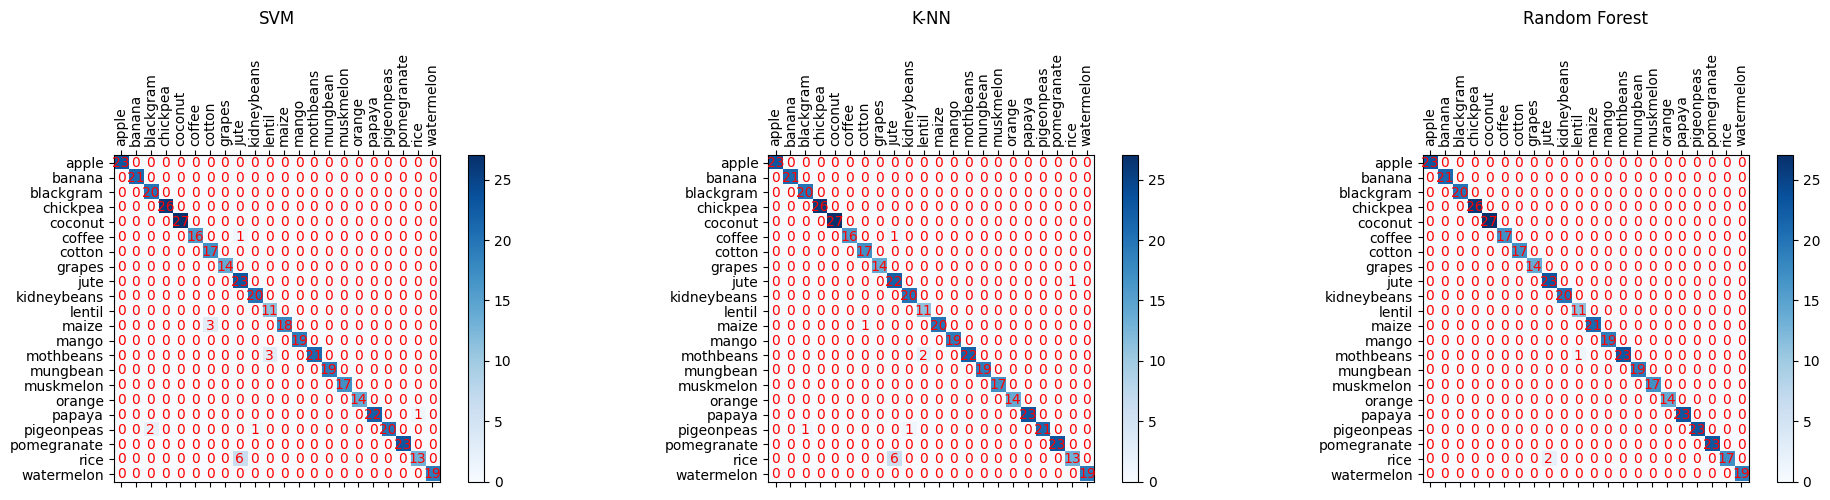

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

cms = [SVM_Metrics['cm'], Knn_Metrics['cm'], rnd_forest_Metrics['cm']]
titles = ['SVM', 'K-NN', 'Random Forest']

for ax, cm, title in zip(axes, cms, titles):

    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    plt.colorbar(cax, ax=ax)
    ax.set_title(title, pad=20)
    ax.set_xticks(np.arange(len(le.classes_)))
    ax.set_yticks(np.arange(len(le.classes_)))
    ax.set_xticklabels(le.classes_, rotation=90)
    ax.set_yticklabels(le.classes_)
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='red')

plt.tight_layout()
plt.show()